In [71]:
import pandas as pd
import numpy as np
import seaborn as sns

In [72]:
auto_mpg = pd.read_fwf("auto-mpg.data", header=None)

In [73]:
auto_mpg.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


### renaming columns using auto-mpg.names file

In [74]:
auto_mpg.columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", 
                    "acceleration", "model year", "origin", "car name"]

In [75]:
auto_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [76]:
auto_mpg.shape

(398, 9)

In [77]:
auto_mpg[auto_mpg.horsepower == "?"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046.0,19.0,71,1,"""ford pinto"""
126,21.0,6,200.0,?,2875.0,17.0,74,1,"""ford maverick"""
330,40.9,4,85.0,?,1835.0,17.3,80,2,"""renault lecar deluxe"""
336,23.6,4,140.0,?,2905.0,14.3,80,1,"""ford mustang cobra"""
354,34.5,4,100.0,?,2320.0,15.8,81,2,"""renault 18i"""
374,23.0,4,151.0,?,3035.0,20.5,82,1,"""amc concord dl"""


### replacing "?" with null values and converting the column to numeric types

In [78]:
auto_mpg.loc[auto_mpg.horsepower == "?", "horsepower"] = np.nan

In [79]:
auto_mpg[auto_mpg.horsepower == "?"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


In [80]:
auto_mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [81]:
auto_mpg.horsepower = auto_mpg.horsepower.astype("float")

In [82]:
auto_mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [83]:
auto_mpg.origin.unique()

array([1, 3, 2])

In [84]:
auto_mpg.loc[auto_mpg.origin == 1, "origin"] = "USA"
auto_mpg.loc[auto_mpg.origin == 2, "origin"] = "Asia"
auto_mpg.loc[auto_mpg.origin == 3, "origin"] = "Europe"

In [85]:
auto_mpg.origin.unique()

array(['USA', 'Europe', 'Asia'], dtype=object)

In [86]:
cylinder_dist = auto_mpg.groupby("cylinders").agg(count = ("cylinders", "size")).reset_index()

### Create a bar chart that shows the distribution for cylinders.

In [87]:
cylinder_dist

,cylinders,count
0,3,4
1,4,204
2,5,3
3,6,84
4,8,103


<AxesSubplot:xlabel='cylinders', ylabel='count'>

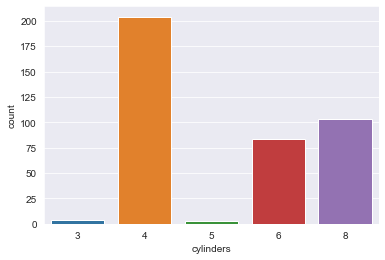

In [88]:
sns.set_style("darkgrid")
sns.barplot(x = "cylinders", y = "count", data = cylinder_dist)

### Create a scatterplot that shows the relationship between horsepower and weight.

<AxesSubplot:xlabel='horsepower', ylabel='weight'>

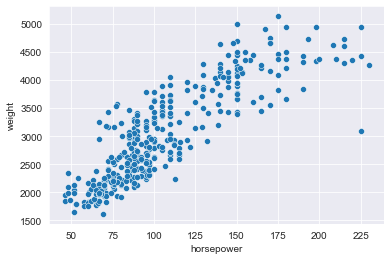

In [89]:
sns.set_style("darkgrid")
sns.scatterplot(x = "horsepower", y = "weight", data = auto_mpg[["horsepower", "weight"]])

### Hypothesis: does the avg MPG improve with newer models.

In [90]:
avg_mpg = auto_mpg.groupby("model year").agg(avg_mpg = ("mpg", "mean")).reset_index()

In [91]:
avg_mpg

,model year,avg_mpg
0,70,17.689655
1,71,21.250000
2,72,18.714286
3,73,17.100000
4,74,22.703704
5,75,20.266667
6,76,21.573529
7,77,23.375000
8,78,24.061111
9,79,25.093103


<AxesSubplot:xlabel='model year', ylabel='avg_mpg'>

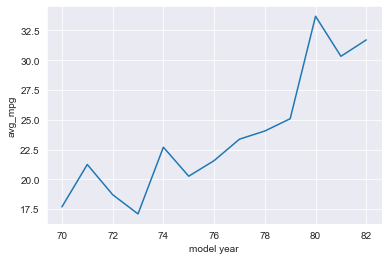

In [92]:
sns.set_style("darkgrid")
sns.lineplot(x = "model year", y = "avg_mpg", data = avg_mpg)

### conclusion: after plotting linechart using avg_mpg of the model year, we can see that the hypothesis of having better mpg with newer model car is supported. 